In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, Q, epsilon=0.0):
        self.q_true = np.random.normal(0, 1, 10)
        self.Q = Q
        self.N = np.ones(10)
        self.epsilon = epsilon
        
    def run(self):
        optimal = 0
        action = None
        if np.random.random() > self.epsilon:
            action = self.exploit()
        else:
            action = self.explore()
        
        reward = np.random.normal(self.q_true[action], 1)
        
        self.N[action] += 1
        self.Q[action] = self.Q[action] + \
                (reward - self.Q[action])/self.N[action]
        
        # calculate optimal action graph
        if action == np.argmax(self.q_true):
            optimal = 1
        
        return reward, optimal
    
    def explore(self):
        return np.random.choice(10)
    
    def exploit(self):
        return np.argmax(self.Q)

In [3]:
def compute_avg_rewards(epsilon, epochs, num_bandits, action_estimates):
    # create 2000(num_bandit) problems each with their own action-value 
    # estimates
    bandits = [Bandit(np.zeros(10), epsilon) for b in range(num_bandits)]
    avg_rewards = []
    avg_optimal = []
    
    for i in range(1, epochs):
        bandit_rewards = []
        optimal_actions = []
        
        # for each bandit problem, compute reward(R) and optimal action and 
        # update action-value estimates internally in the Bandit Object
        for j in range(num_bandits):
            reward, optimal = bandits[j].run()
            
            bandit_rewards.append(reward)
            optimal_actions.append(optimal)
        
        # compute mean reward for all bandit problems at time step t
        mean = np.mean(bandit_rewards)
        mean_optimal = np.mean(optimal_actions)
        
        avg_rewards.append(mean)
        avg_optimal.append(mean_optimal * 100)
        
        if i % 100 == 0:
            print(f"timestep {i}, mean: {mean:.5f}, optimal action %: " \
                  f"{mean_optimal * 100:.2f}")
    return avg_rewards, avg_optimal

timestep 100, mean: 0.96005, optimal action %: 35.85
timestep 200, mean: 0.99851, optimal action %: 36.05
timestep 300, mean: 1.04548, optimal action %: 36.10
timestep 400, mean: 0.98348, optimal action %: 36.20
timestep 500, mean: 0.96377, optimal action %: 36.20
timestep 600, mean: 0.96755, optimal action %: 36.20
timestep 700, mean: 0.98526, optimal action %: 36.20
timestep 800, mean: 0.99935, optimal action %: 36.20
timestep 900, mean: 1.00789, optimal action %: 36.20
timestep 100, mean: 1.12183, optimal action %: 49.60
timestep 200, mean: 1.20598, optimal action %: 58.15
timestep 300, mean: 1.30538, optimal action %: 64.25
timestep 400, mean: 1.29777, optimal action %: 67.85
timestep 500, mean: 1.34063, optimal action %: 71.10
timestep 600, mean: 1.35396, optimal action %: 72.40
timestep 700, mean: 1.36890, optimal action %: 74.25
timestep 800, mean: 1.33407, optimal action %: 74.35
timestep 900, mean: 1.36287, optimal action %: 76.30
timestep 100, mean: 1.02161, optimal action %:

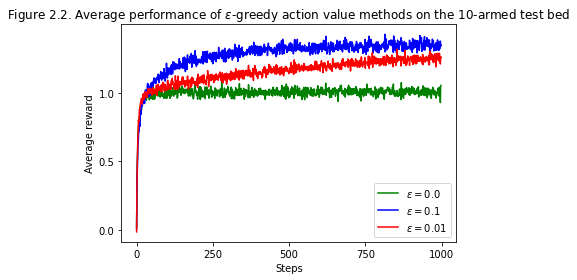

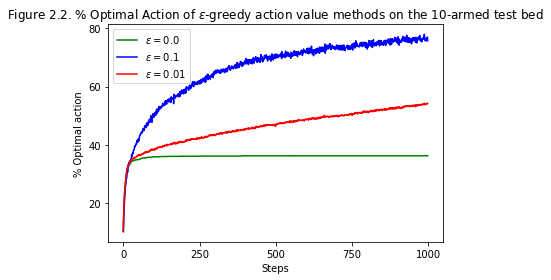

In [4]:
epsilon = [ 0.0, 0.1, 0.01 ]
clr = ['g', 'b', 'r' ]
num_bandits = 2000
epochs = 1000
action_estimates = np.zeros(10)

# average reward graph for epsilon greedy
# xticks and yticks are added 1 and 0.1, respectively for inclusive upper bound
plt.figure(1)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.xticks(np.arange(0, epochs+1, step=250))
plt.yticks(np.arange(0, 1.5+0.5, step=0.5))
plt.title(f"Figure 2.2. Average performance of $\epsilon$-greedy action value " \
          f"methods on the 10-armed test bed")

# optimal action graph for epsilon greedy
plt.figure(2)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.xticks(np.arange(0, epochs+1, step=250))
plt.yticks(np.arange(0, 100+1, step=20))
plt.title(f"Figure 2.2. % Optimal Action of $\epsilon$-greedy action value "
          f"methods on the 10-armed test bed")

for idx, eps in enumerate(epsilon):
    reward, optimal_action = compute_avg_rewards(eps, epochs, num_bandits, action_estimates)
    
    plt.figure(1)
    plt.plot(reward, clr[idx], label=f"$\epsilon={eps}$")
    plt.legend()
    
    plt.figure(2)
    plt.plot(optimal_action, clr[idx], label=f"$\epsilon={eps}$")
    plt.legend()

plt.figure(1)
plt.savefig("figure2.2-average.png", bbox_inches="tight")

plt.figure(2)
plt.savefig("figure2.2-optimal-action.png", bbox_inches="tight")

In [5]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])